In [ ]:
# 신상품: 캔 와인. 주류는 온라인 판매가 불가
# 온라인 예약 후에 오프라인매장에서 구매를 유도하려고 함

# 알콜도수, 당도, pH 값으로 와인 종류를 구별해보자 (레드, 화이트)

# 로지스틱 회귀 모델 사용

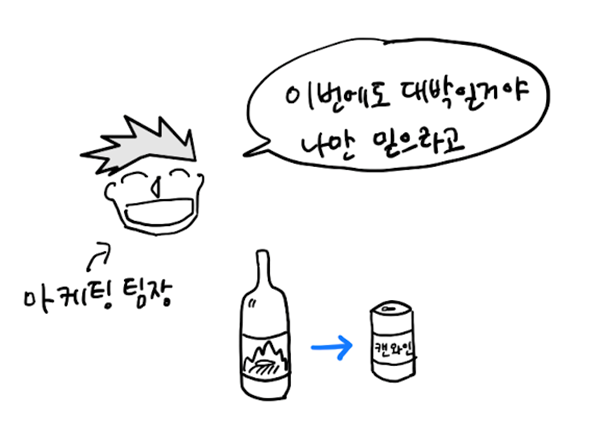

In [70]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
# 알콜, 당도, 산도, 클래스(타겟 =0(레드와인), 1(화이트와인))
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [71]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()

target = wine['class'].to_numpy()

print(data , target)

[[ 9.4   1.9   3.51]
 [ 9.8   2.6   3.2 ]
 [ 9.8   2.3   3.26]
 ...
 [ 9.4   1.2   2.99]
 [12.8   1.1   3.34]
 [11.8   0.8   3.26]] [0. 0. 0. ... 1. 1. 1.]


In [72]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [73]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_scaled, "\n\n")
print(test_scaled)

[[ 0.01376574  0.4646116  -0.16888369]
 [ 1.60871671 -0.70299854  0.26967864]
 [ 1.10504798 -0.70299854  1.20945505]
 ...
 [-0.82568214  0.0267578   0.14437512]
 [-0.82568214  0.52716215 -0.23153545]
 [-0.82568214 -0.57789745  1.83597265]] 


[[ 1.44082714  1.52797084  0.26967864]
 [-0.48990299 -0.68214836  0.3323304 ]
 [ 1.27293756  0.40206106 -0.23153545]
 ...
 [ 1.60871671 -0.76554908 -0.16888369]
 [-0.90962693  0.88161523  0.52028568]
 [-1.49724045  2.09092573 -1.98578474]]


In [74]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target)) # 78.1
print(lr.score(test_scaled, test_target)) # 77.8

0.7808350971714451
0.7776923076923077


In [62]:
print(lr.coef_, lr.intercept_) # 도수, 당도, pH

[[ 0.55517002  1.66965885 -0.68090619]] [1.77996562]


In [ ]:
# 설명에 있어서 어려움이 존재

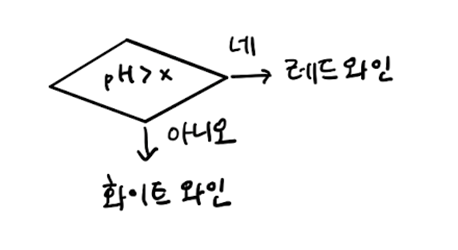

In [75]:
# 결정트리
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target)) # 99.7%
print(dt.score(test_scaled, test_target)) # 85.9%

0.996921300750433
0.8592307692307692


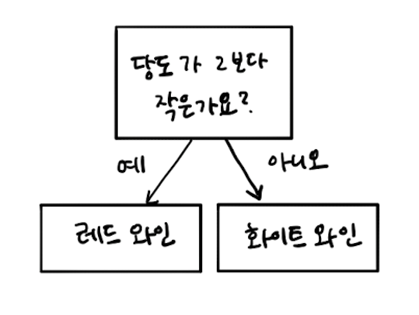

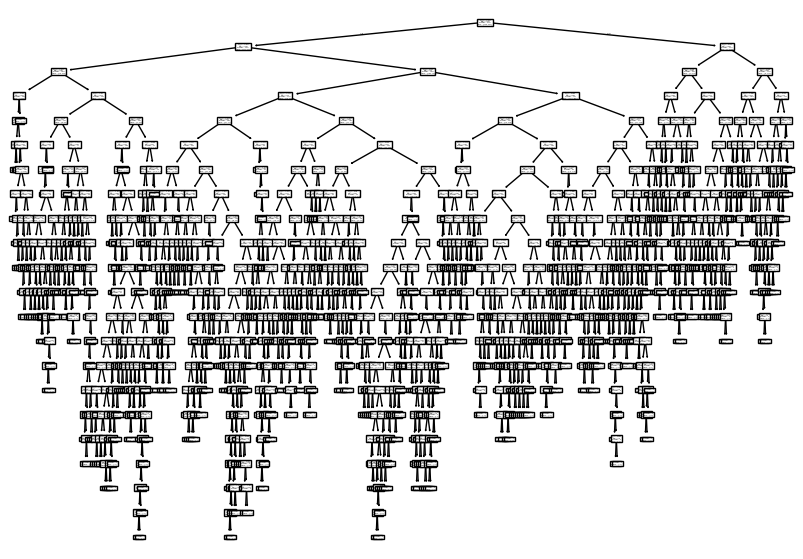

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

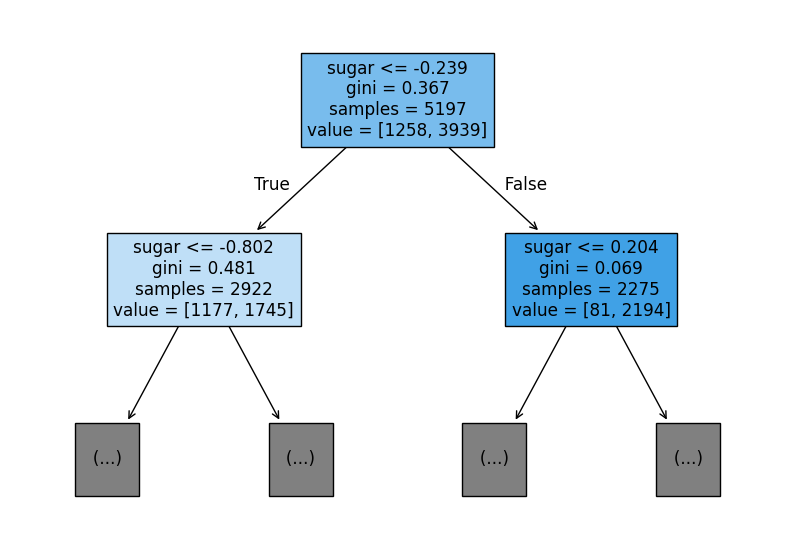

In [76]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])  # 2번째 판단기준까지 보여줌
plt.show()  # gini 는 불순도.  1-(1/x) 의 최대값을 가짐 (현재 x=2)
# value = [class=0,class=1]

In [ ]:
# filled = True 설정으로 gini 가 낮을수록 (순도가 높아질수록) 배경색이 진해짐
# 최종노드(리프노드)에 더 많이 존재하는 클래스로 예측하게 됨

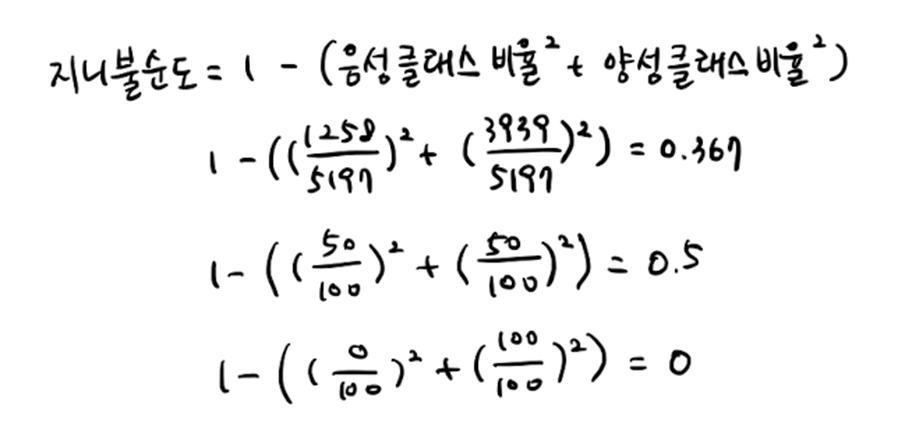

In [77]:
# 가지치기: 트리의 최대 깊이(depth)를 제한한다

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target)) # 84.5%
print(dt.score(test_scaled, test_target)) # 84.2%

0.8454877814123533
0.8415384615384616


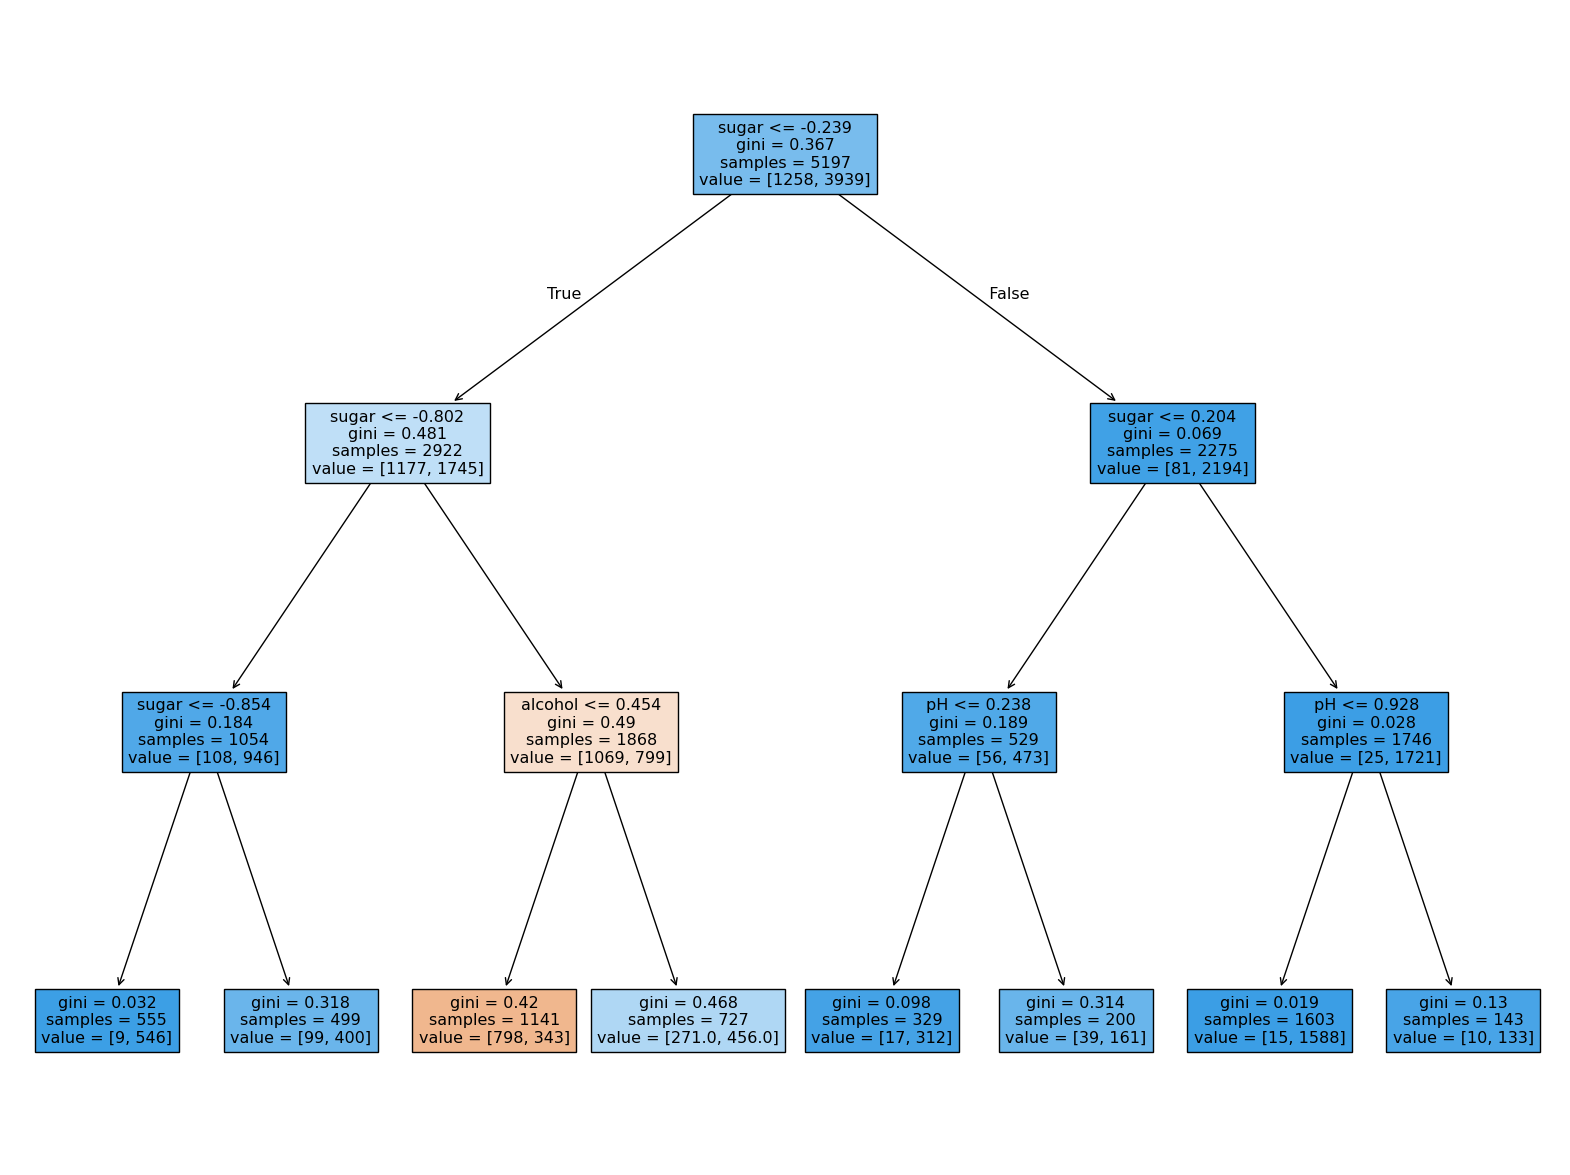

In [78]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled = True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
# depth=0,1 당도기준
# depth=2 당도,알코올,pH기준
# depth=3 최종노드
# 현재 레드와인(0)으로 분류되는건 왼쪽에서 3번째 노드에 도착하는것뿐

# 결정트리는 표준점수화가 불필요(이진분류의 연속이기 때문에 특성들의 스케일 차이에 영향을 받지않음). 오히려 설명할 때 어려워질 수 있음

In [79]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))  # 84.5%
print(dt.score(test_input, test_target))    # 84.2%

0.8454877814123533
0.8415384615384616


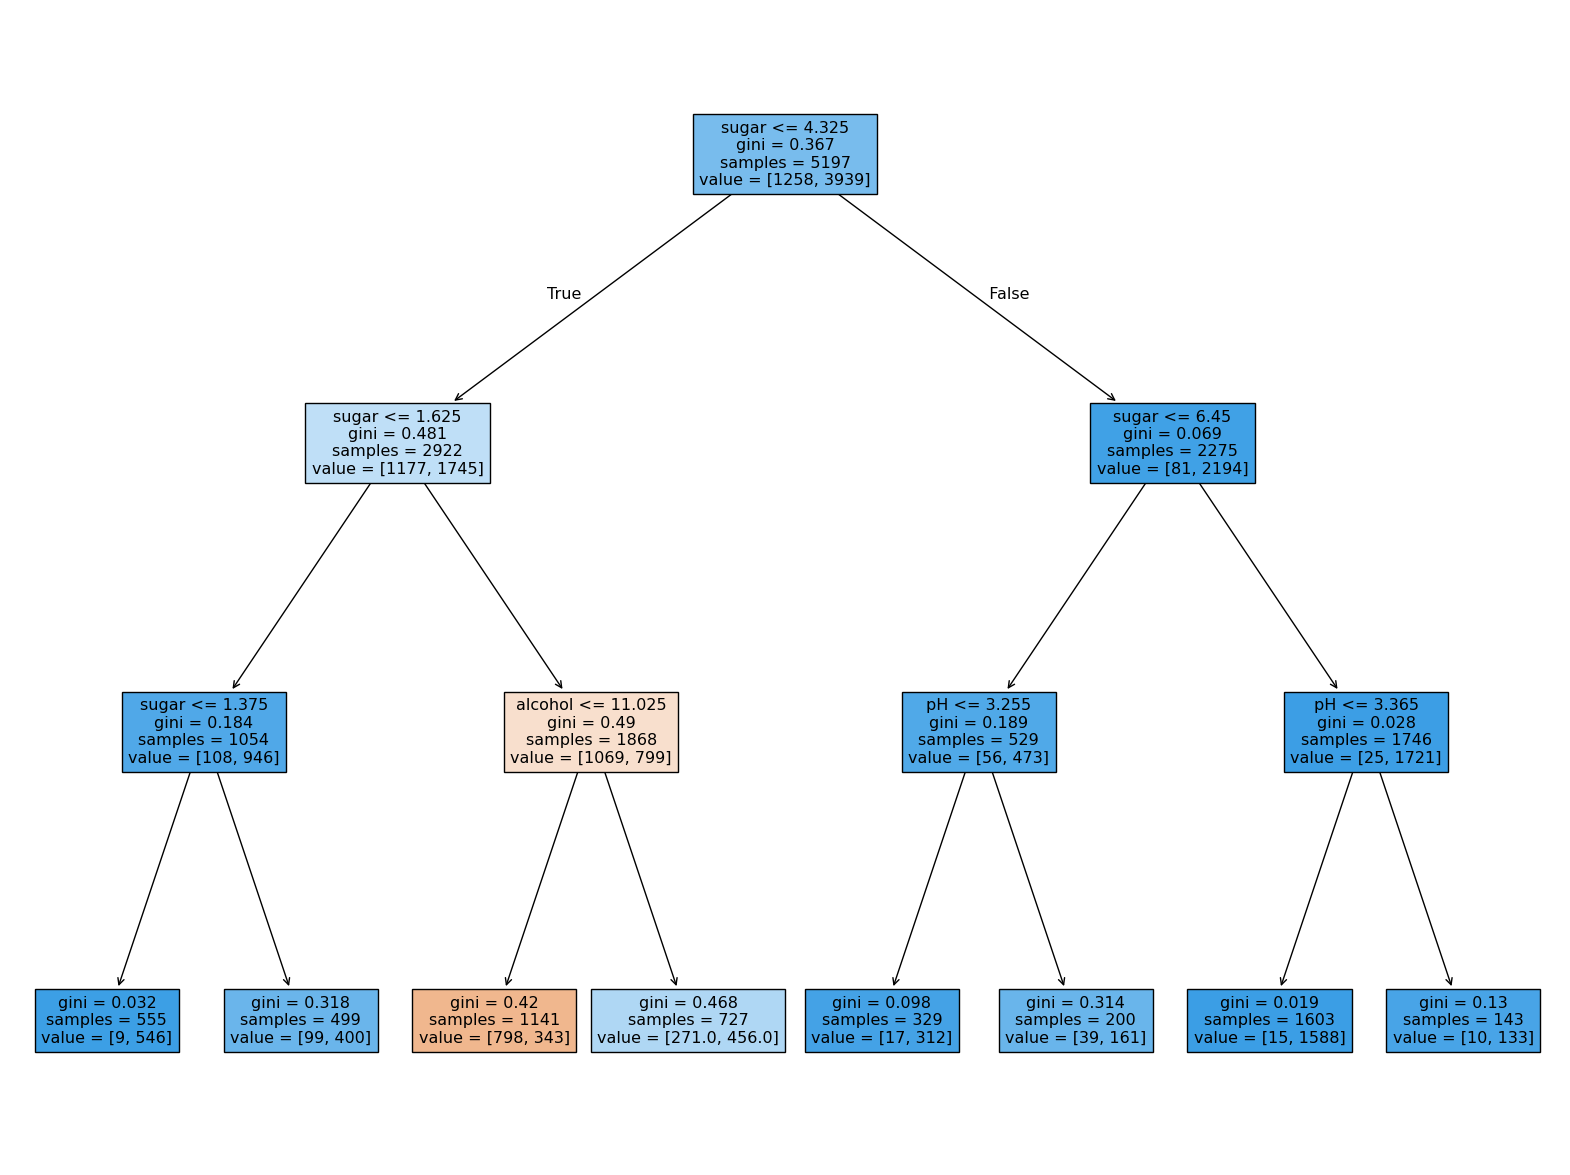

In [80]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled = True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
# 당도가 1.625보다 크고 4.325보다 작은 와인 중에
# 알콜 도수가 11.025와 같거나 작은것이 레든와인 으로 판단됨.
# 이런식으로 설명하기가 쉬움

In [82]:
print(dt.feature_importances_) # 특성중요도 (합은 1)
#   알콜 도수    당도         ph     -> 순서는 입력값

[0.12345626 0.86862934 0.0079144 ]


In [83]:
# 좌우가 균일하지 않은 트리
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target)) # 88.7%
print(dt.score(test_input, test_target)) # 86.2%

0.8874350586877044
0.8615384615384616


In [88]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled = True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()